In [1]:
import os

In [2]:
# !pip install tensorflow[and-cuda]

In [3]:
import tensorflow as tf

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

2024-04-23 16:53:53.600881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 16:53:53.601016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 16:53:53.725599: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.15.0


In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
from tensorflow.keras.applications import VGG16
# model = VGG16()

In [6]:
# model.summary()

In [7]:
# import os
# import pickle
# import numpy as np
# from tqdm.notebook import tqdm
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Model
# from tensorflow.keras.utils import to_categorical, plot_model
# from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [8]:
# Load pre-trained VGG16 model (without top layers)
b_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
b_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.applications import Xception
model = Xception( include_top=False, pooling='avg' )

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, None,      │        864 │ input_layer_1[0]… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, None,      │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, None,      │          0 │ block1_conv1_bn[… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, None,      │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, None,      │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, None,      │          0 │ block1_conv2_bn[… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, None,      │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, None,      │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, None,      │          0 │ block2_sepconv1_… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, None,      │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, None,      │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │      8,192 │ block1_conv2_act… │
│                     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, None,      │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None,      │          0 │ block2_pool[0][0… │
│                     │ None, 128)        │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, None,      │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [12]:
import cv2 as cv

In [13]:
!pip install pillow

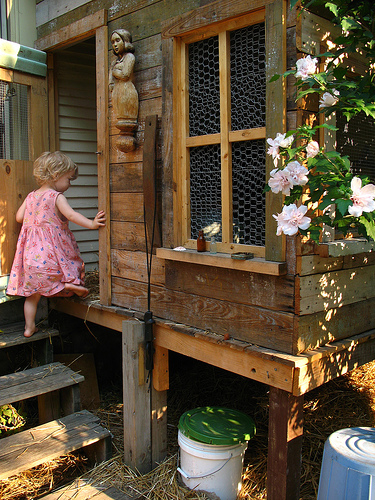

In [14]:
# import PIL as pil
from PIL import Image
pil_im = Image.open('/kaggle/input/flickr8k/Images/1000268201_693b08cb0e.jpg')
display(pil_im)

In [ ]:
img = cv.imread('/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/1000092795.jpg')
img_resized = cv.resize(img,(224,224))

In [ ]:
img_resized.shape

In [ ]:
img_resized.shape

In [ ]:
img_resized = img_resized.reshape(1,224,224,3)

In [ ]:
img_resized.shape

In [ ]:
feature = b_model.predict(img_resized)

In [ ]:
feature.shape

In [ ]:
feature_x = feature.reshape(7,7,512)

In [ ]:
feature_x.shape

In [ ]:
chinu = '1000092795.jpg'
chinu_id = chinu.split('.')[0]
chinu_id

In [ ]:
imgs_path = '/kaggle/input/flickr8k/Images/'
# for img_name in os.listdir(imgs_path):
#     print(img_name)

In [ ]:
features_dict = {}

In [ ]:
features_dict = {}
for img_name in os.listdir(imgs_path):
    img_path = os.path.join(imgs_path,img_name)
    img = cv.imread(img_path)
    img_resized = cv.resize(img,(224,224))
    img_resized = img_resized.reshape(1,224,224,3)
    feature = model.predict(img_resized)
    feature = feature.reshape(7,7,512)
#   now we want to map image id with its feature vector
    img_id = img_name.split('.')[0]
    features_dict[img_id] = feature

# feature dictionary ready

In [14]:
import pickle

In [15]:
with open('/kaggle/input/f-d-final/f_d_xception', 'rb') as f:
    f_d = pickle.load(f)

In [16]:
with open('/kaggle/input/features-f/f_d_f', 'rb') as f:
    f_d_v = pickle.load(f)

In [17]:
arr = f_d_v['1000268201_693b08cb0e']
arr.shape

(7, 7, 512)

In [18]:
len(f_d)

8091

In [19]:
arr = f_d['1000268201_693b08cb0e']

In [20]:
arr

array([[0.33581656, 0.06291332, 0.1029906 , ..., 0.01776395, 0.01884102,
        0.24827866]], dtype=float32)

In [21]:
!pip install regex

In [22]:
file_path = '/kaggle/input/flickr8k/captions.txt'
import re
cap_d = {}
i = 0
# Open the text file in read mode
with open(file_path, 'r') as file:
    for line in file:
        if(i == 0):
            i = 1
            continue
        line = line.split(',')
        img_id = line[0]
        key = img_id.split('.')[0]
        cap = line[-1].split('.')[0]
        cap = cap.lower()
        cap = re.sub(r'[^\w\s]', '', cap)
        cap = re.sub('\s+', ' ', cap)
        cap = 'startcap ' + " ".join([word for word in cap.split() if len(word)>1]) + " endcap"
        if key not in cap_d:
            cap_d[key] = []
        cap_d[key].append(cap)

# def preprocess(text):
#     text = text.lower()
#     text = re.sub(r'[^\w\s]', '', text)
#     text = re.sub('\s+', ' ', text)
#     text = text.strip()
#     text = '[start] ' + text + ' [end]'
#     return text

In [23]:
cap_d['1000268201_693b08cb0e']

['startcap child in pink dress is climbing up set of stairs in an entry way endcap',
 'startcap girl going into wooden building endcap',
 'startcap little girl climbing into wooden playhouse endcap',
 'startcap little girl climbing the stairs to her playhouse endcap',
 'startcap little girl in pink dress going into wooden cabin endcap']

In [24]:
len(cap_d)

8091

In [25]:
for cap in cap_d['1000268201_693b08cb0e']:
    print(cap)

startcap child in pink dress is climbing up set of stairs in an entry way endcap
startcap girl going into wooden building endcap
startcap little girl climbing into wooden playhouse endcap
startcap little girl climbing the stairs to her playhouse endcap
startcap little girl in pink dress going into wooden cabin endcap


In [26]:
caps = []
img_id = []
for i in cap_d:
    img_id.append(i)
    for cap in cap_d[i]:
        caps.append(cap)

In [27]:
len(caps)

40455

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(caps)
word2index = tokenizer.word_index

In [29]:
word2index

{'startcap': 1,
 'endcap': 2,
 'in': 3,
 'the': 4,
 'on': 5,
 'is': 6,
 'and': 7,
 'dog': 8,
 'with': 9,
 'man': 10,
 'of': 11,
 'two': 12,
 'white': 13,
 'black': 14,
 'boy': 15,
 'are': 16,
 'woman': 17,
 'girl': 18,
 'to': 19,
 'wearing': 20,
 'at': 21,
 'water': 22,
 'people': 23,
 'red': 24,
 'young': 25,
 'brown': 26,
 'an': 27,
 'his': 28,
 'blue': 29,
 'running': 30,
 'through': 31,
 'dogs': 32,
 'while': 33,
 'playing': 34,
 'down': 35,
 'ball': 36,
 'standing': 37,
 'shirt': 38,
 'little': 39,
 'grass': 40,
 'child': 41,
 'person': 42,
 'snow': 43,
 'jumping': 44,
 'over': 45,
 'front': 46,
 'sitting': 47,
 'holding': 48,
 'three': 49,
 'field': 50,
 'up': 51,
 'small': 52,
 'by': 53,
 'large': 54,
 'green': 55,
 'group': 56,
 'yellow': 57,
 'her': 58,
 'walking': 59,
 'children': 60,
 'into': 61,
 'air': 62,
 'men': 63,
 'beach': 64,
 'near': 65,
 'one': 66,
 'mouth': 67,
 'jumps': 68,
 'another': 69,
 'for': 70,
 'its': 71,
 'street': 72,
 'from': 73,
 'riding': 74,
 'runs'

In [30]:
len(word2index)

8671

In [31]:
seqs = tokenizer.texts_to_sequences(caps)

In [32]:
maxlen = 0
for seq in seqs:
    maxlen = max(maxlen,len(seq))
maxlen

31

In [33]:
from tensorflow.keras.utils import pad_sequences
x = pad_sequences([seqs[0]],maxlen, padding = 'pre')

In [34]:
x[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,   41,    3,   90,  168,    6,  117,
         51,  402,   11,  386,    3,   27, 5107,  680,    2], dtype=int32)

In [35]:
split = int(len(img_id)*(0.9))
train = img_id[:split]
test = img_id[split:]

In [36]:
from tensorflow.keras.utils import to_categorical
import numpy as np

In [37]:
def data_generator(data_ids, batch_size):
    x1, x2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_ids:
            n += 1
            capts = cap_d[key]
            for capt in capts:
                seq = tokenizer.texts_to_sequences([capt])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=maxlen)[0]        #pre-truncating
                    in_seq = in_seq.astype(np.float32)
                    out_seq = to_categorical([out_seq],num_classes= len(word2index)+1)[0]
                    features = f_d[key]
                    features = features.reshape(2048,)
                    x1.append(features)                      # f_d[key] shape => (2048,)
                    x2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                x1, x2, y = np.array(x1), np.array(x2), np.array(y)
                yield (x1, x2), y
                x1, x2, y = list(), list(), list()
                n = 0

In [38]:
# x1_t, x2_t, y_t = list(), list(), list()
# for key in test:
#     capts = cap_d[key]
#     for capt in capts:
#         seq = tokenizer.texts_to_sequences([capt])[0]
#         for i in range(1, len(seq)):
#             in_seq, out_seq = seq[:i], seq[i]
#             in_seq = pad_sequences([in_seq], maxlen=maxlen)[0]        #pre-truncating
#             out_seq = to_categorical([out_seq],num_classes= len(word2index)+1)[0]
# #             x1_t.append(f_d[key])
#             features = f_d[key]
#             features = features.reshape(2048,)
#             x1_t.append(features)                      
#             x2_t.append(in_seq)
#             y_t.append(out_seq)

# x1_t, x2_t, y_t = np.array(x1_t), np.array(x2_t), np.array(y_t)

In [39]:
# x1_t[0].dtype
# x2_t[0].dtype

In [40]:
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [41]:
l = []
features = f_d['1000268201_693b08cb0e']
features = features.reshape(2048,)
l.append(features)

features = f_d['1001773457_577c3a7d70']
features = features.reshape(2048,)
l.append(features)

In [42]:
l = np.array(l)
l.shape

(2, 2048)

In [43]:
base_model = Xception(include_top=True)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [44]:
base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 74, 74,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add_12[0][0]    

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [45]:
inputs1 = Input(shape = (2048,))
# flatted = Flatten()(inputs1)
#  (None, 25088)
# imgd1 = Dense(1000, activation='relu')(inputs1)
drop1 = Dropout(0.2)(inputs1)
imgd2 = Dense(256, activation='relu')(drop1)

# sequence feature layers
inputs2 = Input(shape=(maxlen,))
cd1 = Embedding(input_dim = len(word2index) + 1,
              output_dim = 256,
              mask_zero=True, 
              )(inputs2)                                        #mask_zero = ignore padded zeroes
# cd1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
drop2 = Dropout(0.4)(cd1)
cd2 = LSTM(units = 256)(drop2)

# decoder model
decoder1 = add([imgd2, cd2])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(len(word2index) + 1, activation='softmax')(decoder2)


In [46]:
model = Model(inputs=(inputs1, inputs2), outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [47]:
# plot_model(model, show_shapes=True)

In [48]:
epochs = 20
batch_size = 32
steps = len(train) // batch_size
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="loss", mode="min", patience=0,verbose=1)

for i in range(epochs):
    # create data generator
    generator = data_generator(train,batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, callbacks=[early_stop], steps_per_epoch=steps, verbose=1)
    

# model.fit(x_train, y_train, batch_size=batch_size, epochs = 3,
#           shuffle=True,validation_data=(x_test, y_test), callbacks=[early_stop])

227/227 ━━━━━━━━━━━━━━━━━━━━ 63s 254ms/step - accuracy: 0.1226 - loss: 6.0442
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 254ms/step - accuracy: 0.2513 - loss: 4.1838
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 256ms/step - accuracy: 0.2896 - loss: 3.6814
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 255ms/step - accuracy: 0.3110 - loss: 3.3942
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 253ms/step - accuracy: 0.3260 - loss: 3.1908
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 253ms/step - accuracy: 0.3402 - loss: 3.0239
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 253ms/step - accuracy: 0.3541 - loss: 2.8862
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 253ms/step - accuracy: 0.3670 - loss: 2.7736
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 252ms/step - accuracy: 0.3800 - loss: 2.6753
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 252ms/step - accuracy: 0.3914 - loss: 2.5898
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 253ms/step - accuracy: 0.4013 - loss: 2.5154
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 251ms/step - accuracy: 0.4116 - loss: 2.4452
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 252ms/step - accuracy: 0.4193 -

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
loss = pd.DataFrame(model.history.history)
# plt.plot(loss['accuracy'],label = 'model1_loss')
# plt.legend()
# plt.show()

In [50]:
# from tensorflow.keras.models import load_model
# model = load_model('/kaggle/input/cap-model/model1.h5')

In [51]:
def int_to_word(integer):
    for word, index in word2index.items():
        if index == integer:
            return word

In [52]:
caption = caps[0]
caption

'startcap child in pink dress is climbing up set of stairs in an entry way endcap'

In [53]:
tok = tokenizer.texts_to_sequences([caption])


In [54]:
in_seq = pad_sequences(tok, maxlen=maxlen)
in_seq

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,   41,    3,   90,  168,    6,  117,
          51,  402,   11,  386,    3,   27, 5107,  680,    2]],
      dtype=int32)

In [55]:
feature_v = f_d["1000268201_693b08cb0e"]
feature_v.shape

(1, 2048)

In [56]:
feat = feature_v

In [57]:
feat

array([[0.33581656, 0.06291332, 0.1029906 , ..., 0.01776395, 0.01884102,
        0.24827866]], dtype=float32)

In [58]:
feat = np.array(feat)

In [59]:
feat.shape

(1, 2048)

In [60]:
out_seq = model.predict((feat,in_seq))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


In [61]:
out_seq

array([[4.1809201e-14, 2.7546562e-15, 8.9323193e-01, ..., 7.0267782e-15,
        5.1121725e-15, 1.8462071e-14]], dtype=float32)

In [62]:
out_seq_0 = out_seq[0]

In [63]:
out_seq_0.shape

(8672,)

In [64]:
a = np.argmax(out_seq_0)

In [65]:
b = np.argmax(out_seq)

In [66]:
a

2

In [67]:
b

2

In [68]:
def generate_cap(img_id):
    in_word = 'startcap'
    for i in range(maxlen):
        tok = tokenizer.texts_to_sequences([in_word])
        in_seq = pad_sequences(tok, maxlen=maxlen)
        feature_v = f_d[img_id]
#         resize_feature_v = [feature_v]
        feature_arr_v = np.array(feature_v)
        out_seq = model.predict((feature_arr_v,in_seq))[0]
        out_word_seq = np.argmax(out_seq)
        out_word = int_to_word(out_word_seq)
        in_word += " " + out_word
        
        if(out_word == 'endcap'):
            break
    return in_word

## testing the model

In [69]:
generate_cap('103195344_5d2dc613a3')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'startcap boy is standing in front of large metal building endcap'

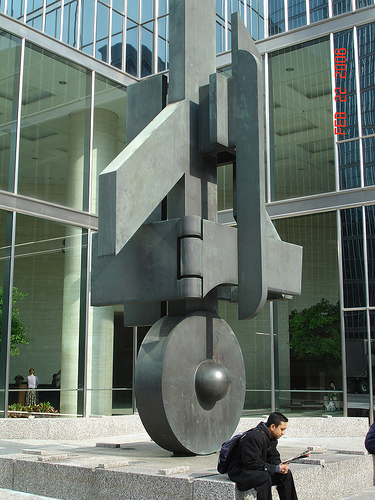

In [70]:
from PIL import Image
pil_im = Image.open('/kaggle/input/flickr8k/Images/103195344_5d2dc613a3.jpg')
display(pil_im)

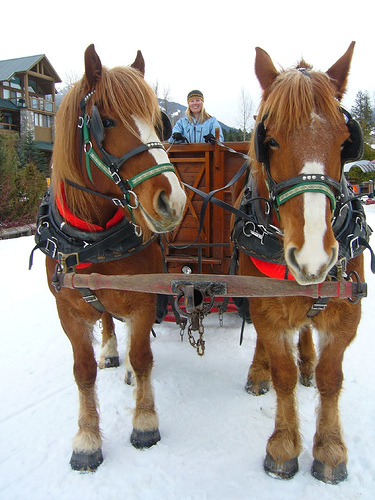

In [71]:
pil_im = Image.open('/kaggle/input/flickr8k/Images/109202801_c6381eef15.jpg')
display(pil_im)

In [72]:
generate_cap('109202801_c6381eef15')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'startcap two draft horses pull another man on the ground endcap'

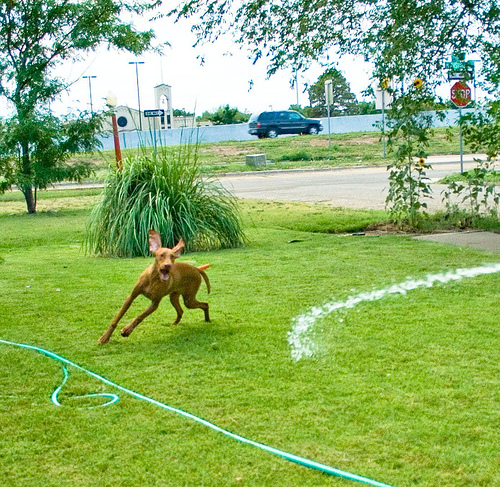

In [73]:
pil_im = Image.open('/kaggle/input/flickr8k/Images/1019077836_6fc9b15408.jpg')
display(pil_im)

In [74]:
generate_cap('1019077836_6fc9b15408')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


'startcap brown dog is running on the grass endcap'

In [75]:
cap_d['103195344_5d2dc613a3']

['startcap man in black is sitting next to modern art structure in front of glass building endcap',
 'startcap man sits and reads newspaper by sculpture outside of an office building endcap',
 'startcap man sits near large statue endcap',
 'startcap man sitting in front of metal sculpture in front of building endcap',
 'startcap the man with the backpack is sitting in buildings courtyard in front of an art sculpture reading endcap']

## Actually testing over test data with bleu score

In [76]:
# split = int(len(test)*(0.5))
test = test[:100]

In [77]:
cap_pred = []
cap_test = []

for ids in test:
    caps = cap_d[ids]
    capss = []
    for cap in caps:
        cap = cap.split()
        capss.append(cap)
    cap_test.append(capss)
    cap_p = generate_cap(ids)
    cap_p = cap_p.split()
    cap_pred.append(cap_p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

In [78]:
len(cap_pred)

100

In [79]:
from nltk.translate.bleu_score import corpus_bleu

In [80]:
bleu_1 = corpus_bleu(cap_test, cap_pred, weights=(1.0, 0, 0, 0))

In [81]:
bleu_2 = corpus_bleu(cap_test, cap_pred, weights=(0.5, 0.5, 0, 0))

In [82]:
print(bleu_1,bleu_2)

0.5787401574803149 0.34919878723475484


In [88]:
model.save('/kaggle/working/model2.h5')